**Build a Dense ANN for MNSIT**

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical


In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
x_train=x_train/255.0
x_test=x_test/255.0

In [ ]:
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

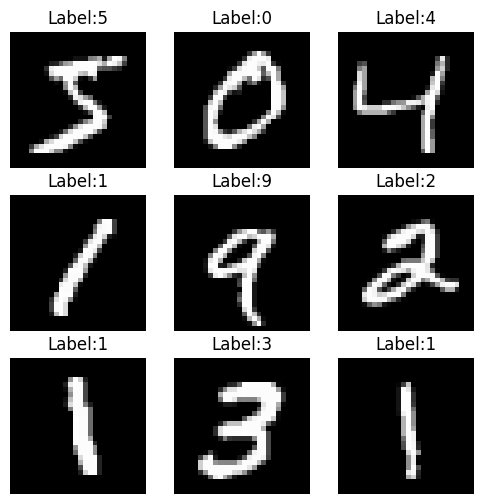

In [ ]:
import numpy as np
plt.figure(figsize=(6,6))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train[i],cmap='gray')
  plt.title("Label:"+str(np.argmax(y_train[i])))
  plt.axis('off')
plt.show()

In [ ]:
model=Sequential([
  Flatten(input_shape=(28,28)),
  Dense(128,activation='relu'),
  Dense(64,activation='relu'),
  Dense(10,activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


***Step-*4*:Compile the model***

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

***Step-5:Train the model***

In [ ]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10,batch_size=128)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8190 - loss: 0.6308 - val_accuracy: 0.9487 - val_loss: 0.1686
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9584 - loss: 0.1381 - val_accuracy: 0.9677 - val_loss: 0.1141
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9734 - loss: 0.0919 - val_accuracy: 0.9714 - val_loss: 0.0905
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9785 - loss: 0.0709 - val_accuracy: 0.9713 - val_loss: 0.0932
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9850 - loss: 0.0492 - val_accuracy: 0.9738 - val_loss: 0.0864
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9872 - loss: 0.0436 - val_accuracy: 0.9745 - val_loss: 0.0834
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9890 - loss: 0.0344 - val_accuracy: 0.9764 - val_loss: 0.0767
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9918 - loss: 0.0284 - val_accuracy: 

***Step-6:Evaluate the Model***

In [ ]:
test_loss,test_acc=model.evaluate(x_test,y_test,verbose=0)
print(f"Test accuracy:{test_acc:.4f}")

Test accuracy:0.9787


***Step-7:Plot Training Curves***

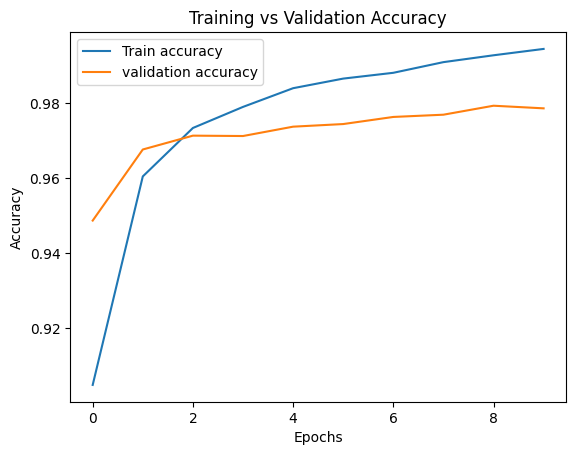

In [ ]:
plt.plot(history.history['accuracy'],label='Train accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


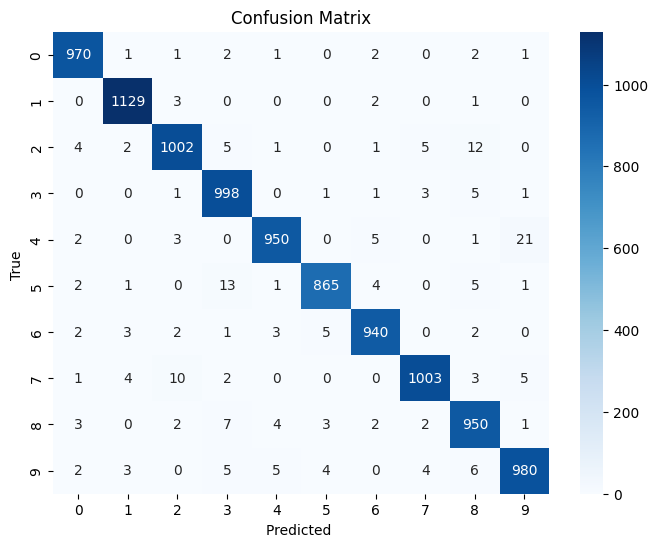

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred=model.predict(x_test)
y_pred_classes=np.argmax(y_pred,axis=1)
y_true=np.argmax(y_test,axis=1)

cm=confusion_matrix(y_true,y_pred_classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted ')
plt.ylabel('True ')
plt.title('Confusion Matrix')
plt.show()

***Step-8:Make predictions***

In [ ]:
import numpy as np
predictions=model.predict(x_test[:5])
print("Predicted labels:",np.argmax(predictions,axis=1))
print("True labels:",np.argmax(y_test[:5],axis=1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predicted labels: [7 2 1 0 4]
True labels: [7 2 1 0 4]


In [ ]:
model.save("handwritten_digit.keras")